# EDA

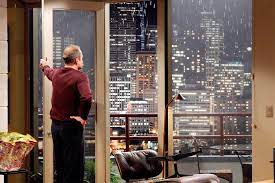

In [29]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.express as px
import geopandas as gpd

In [30]:
df_housing=pd.read_csv('data/eda.csv')

In [31]:
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


Steakholder:

| Charles Christensen | Seller      | Invest with big returns, wondering about renovation?, which Neighborhood? Timing?    

Q: is it smart to sell a house in king county?

Hypothesis: There is a profit margin between buy and sell of houses in king county.
Hypothesis: there is a difference in profit margin between regions
Hypothesis: There is a difference in profit due to neighboring houses

Q:are renovations a good thing for increasing the profit margin?

Hypothesis: Houses that are renovated return a higher profit margin  then unrenovated houses
Hypothesis: Houses that are renovated have a higher grade than unrenovated houses
Hypothesis: The additional profit margin of renovated houses is significant 

Q: is it a good time to sell?

Hypothesis: There is a market timing scheme in profit margins of comparable houses.
->When are the prices lowest/highest
->Is there a periodicity , which? -> FFT

Q: What type of house gives the highest profit margin?

Hypothesis: There is a difference in profit margin between houses of different grades
Hypothesis: There is a increase in profit margin of houses by year of construction
Hypothesis: The price per sqft is not linear across size of houses, there is a maximum


Possible advices: In which region to arbitrage

What is the added profit of renovation, is it actually increasing the profit

At which time to buy and sell might give potentially higher profits.

In the following the data are cleaned from missing values and features , like the price per square feet are generated. The different timing variables (date,yr_build,yr_renovated) is converted to a datetime object.

In [32]:
df_housing[(df_housing.yr_renovated==0)|(df_housing.yr_renovated.isna())|(df_housing.yr_renovated.isnull())].yr_renovated=np.NaN
df_housing['yr_renovated'].dropna(inplace=True)

df_housing.yr_renovated[df_housing.yr_renovated==0]=np.NaN
df_housing['yr_renovated'].dropna(inplace=True)

df_housing['yr_renovated']=df_housing['yr_renovated'].map(lambda x: round(x)/10 if pd.notna(x) else np.NaN)


df_housing['yr_renovated']=pd.to_datetime(df_housing['yr_renovated'],format='%Y',errors='coerce')
df_housing['price_sqft']=df_housing['price']/df_housing['sqft_living']


df_housing['yr_built']=pd.to_datetime(df_housing['yr_built'],format='%Y',errors='coerce')
df_housing['date'] = pd.to_datetime(df_housing['date'],format='%Y-%m-%d',errors='coerce')
df_housing['dayofweek']= df_housing['date'].dt.dayofweek
df_housing['isnotrenovated']=df_housing['yr_renovated'].isna()
df_housing['renovated']=~df_housing['isnotrenovated']

First printa a map of all the sales in the DB

In [33]:
fig=px.scatter_mapbox(df_housing,
                      lat='lat',
                      lon='long',
                      color='price',
                      size_max=15,zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.show()

This tells us not enough information. Therefore we are more interested in the actual ROI. Therefore, we are going to aggregate houses which have been resold, such to calculate the factual price increase of a single house. 
As the timing between resales may differ, we are going to normalize the price difference by the time difference in days

In [34]:
agg_meth={'date':'diff','price':'diff','condition':'diff','price_sqft':'diff','grade':'diff'}
rnnms={'price':'price_diff','date':'time_diff','condition':'condition_diff','price_sqft':'price_sqft_diff','grade':'grade_diff'}
df_grp=df_housing.groupby('house_id').agg(agg_meth)
df_grp.rename(columns=rnnms,inplace=True)
df_grp.describe()
df_grp=df_housing[['house_id','lat','long','price','price_sqft']].join(df_grp)
df_grp.reset_index(drop=True,inplace=True)

df_grp['perc_profit'] = df_grp['price_diff']/df_grp['price']
df_grp['time_diff_D']=df_grp['time_diff'].apply(lambda x: x.days)
df_grp['perc_profit_time']=df_grp['perc_profit']/(df_grp['time_diff_D'])
df_grp['profit_sqft_time']=df_grp['price_sqft_diff']/df_grp['time_diff_D']
df_grp.dropna(inplace=True)
df_grp.sort_values('perc_profit_time',ascending=False,inplace=True)


idlist= df_grp.house_id[0:51]

Lets create a map of these houses which have been resold, and include the relative price increase

In [35]:
fig=px.scatter_mapbox(df_grp,
                      lat='lat',
                      lon='long',
                      color='perc_profit_time',
                      size_max=25,zoom=8,
                      color_continuous_scale=px.colors.sequential.Bluered)
fig.update_traces(marker=dict(size=10))
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.update_layout(title="resale price increase in permille/day")
fig.update_layout(coloraxis_colorbar=dict(title="relative price increase per day"))
fig.show()
fig.write_image("resale_price_increase.png")

Our client is most interest in the maxium profits possible. Therefore we are going to find out if the top 50 most profitable houses have common criteria

In [36]:
top_profits=df_housing[df_housing['house_id'].isin(idlist)]


top_profits_margin=df_grp[:][0:51].copy()
#top_profits_margin.head()
top_profits.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1,price_sqft,dayofweek
count,102.000,102.000,102.000,102.000,102.000,102.000,82.000,102.000,102.000,102.000,...,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,4267588609.569,3.255,1.632,1534.706,8759.078,1.167,0.000,0.039,3.255,6.745,...,98084.333,47.538,-122.252,1570.235,8420.863,317316.039,4267588609.569,9927.696,212.617,1.784
std,2523452346.517,1.050,0.630,503.573,3279.045,0.325,0.000,0.279,0.740,0.767,...,56.959,0.144,0.112,367.458,2634.460,161477.958,2523452346.517,4668.575,104.406,1.325
min,526059224.000,1.000,1.000,790.000,4590.000,1.000,0.000,0.000,1.000,5.000,...,98001.000,47.273,-122.388,810.000,4500.000,82000.000,526059224.000,94.000,87.647,0.000
25%,2053212121.000,3.000,1.000,1155.000,7164.750,1.000,0.000,0.000,3.000,6.000,...,98032.500,47.423,-122.334,1325.000,6327.750,196125.000,2053212121.000,6813.000,141.402,1.000
50%,3883800011.000,3.000,1.750,1520.000,8148.000,1.000,0.000,0.000,3.000,7.000,...,98074.000,47.524,-122.284,1540.000,8359.000,268475.000,3883800011.000,9112.500,194.559,2.000
75%,6142525095.000,3.750,2.000,1830.000,9654.000,1.000,0.000,0.000,4.000,7.000,...,98131.250,47.680,-122.199,1820.000,9522.000,412500.000,6142525095.000,13639.500,259.634,3.000
max,9407110710.000,6.000,4.500,3500.000,21303.000,2.000,0.000,2.000,5.000,8.000,...,98198.000,47.774,-121.771,2570.000,17920.000,740000.000,9407110710.000,19538.000,576.471,5.000


3 Bedrooms, 1 Bathroom, 1 Floor, No Waterfront, No View, Condition 3, Grade 6 or 7, min 5, sqftabove 1200 (915-1405), mostly no basement, sqft living 1490,1497 (1265-1680),sft lot 7454 7680  (5235-9149), price mean (333957), median(261500), 188737-455500

Lets create a map of only these most profitable houses:

In [37]:
fig=px.scatter_mapbox(top_profits_margin,
                      lat='lat',
                      lon='long',
                      color='perc_profit_time',
                      #symbol='grade',
                      size_max=25,zoom=8,
                      color_continuous_scale=px.colors.sequential.Bluered,
                      opacity=0.7)
fig.update_traces(marker_size=12)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.update_layout(coloraxis_showscale=True)
fig.update_layout(title="top 50 price increase per day")
fig.update_layout(coloraxis_colorbar=dict(title="relative price increase per day"))

fig.show()
fig.write_image('map_of_top_profits.png')

Our client wants to know, if houses of these category exhibit a specific market pattern.
Therefore we group all the houses of the same category together and if multiple sales happned in the same time period, we groupn them as well.

Lets visualize the time-series-data.

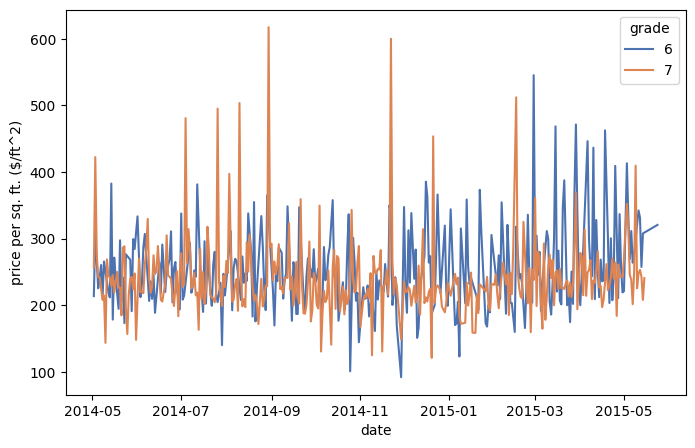

In [38]:
pl=sns.lineplot(data=df_housing[(df_housing.grade==7)|(  df_housing.grade==6)].groupby(['date','grade']).median(), 
             x="date", y="price_sqft", hue="grade",
             palette='deep')
           
pl.set_ylabel("price per sq. ft. ($/ft^2)")
plt.savefig("housing_price_per_sqft.png",dpi=300)

In [39]:
df_g=df_housing[(df_housing.price_sqft >450) 
           &((df_housing.grade==7)|
             (  df_housing.grade==6))].groupby('dayofweek').max()

There were a few spikes in the data set.
Lets find out where they come from. We suspect that on different weekdays only specific sales are made. 

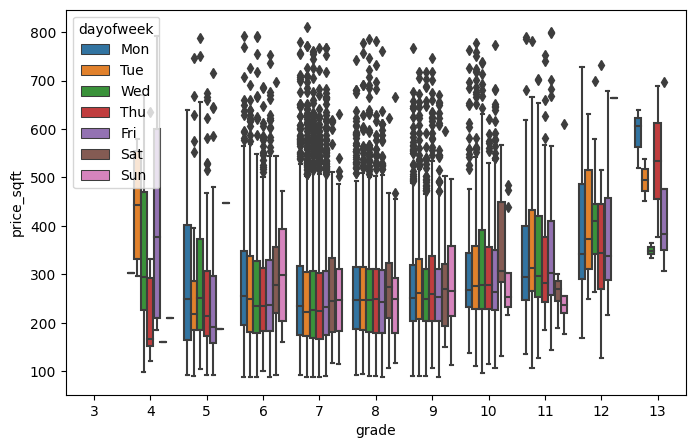

In [40]:
ax=sns.boxplot(data=df_housing, x="grade", y="price_sqft", hue="dayofweek")

weekDays = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
for t, l in zip(ax.legend_.texts, weekDays): t.set_text(l)

Not too much to see here. Lets focus on the high value targets, we pick a price per sqft larger than 450 for all categories. This is way higher than the average price!

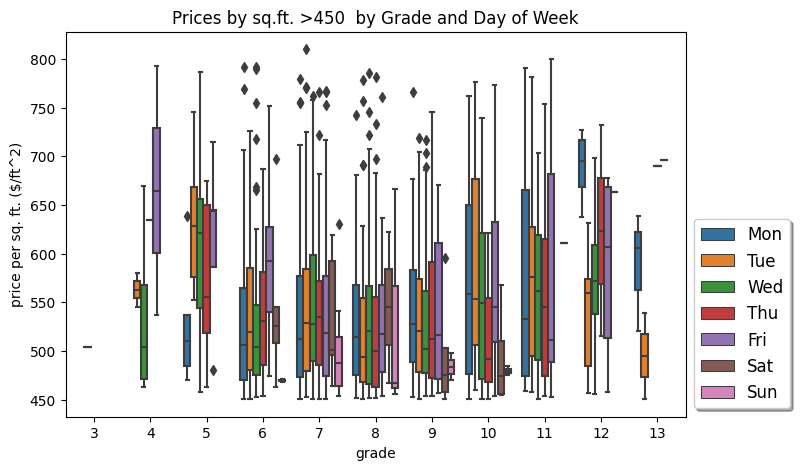

In [41]:
ax=sns.boxplot(data=df_housing[df_housing['price_sqft']>450], x="grade", y="price_sqft", hue="dayofweek")
#ax.legend(loc='lower center',orientation='vertical')

ax.legend(loc='lower left',
      #   bbox_to_anchor=(0.5, -0.05),
      bbox_to_anchor=(1.0, 0),
#ncol=7,
fancybox=True,shadow=True,fontsize=12)


weekDays = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
for t, l in zip(ax.legend_.texts, weekDays): t.set_text(l)

plt.title("Prices by sq.ft. >450  by Grade and Day of Week")
plt.xlabel("grade")
plt.ylabel("price per sq. ft. ($/ft^2)")

#plt.show()
#plt.resize
plt.savefig("pricbysqftbyday.png",dpi=300,bbox_inches = "tight")
plt.show()

Our client wants to know if it is proftiable to renovate a house.
Lets therefore aggregate the data based on the grade, condition and renovation status of the house.

In [42]:
agg_meth={'price':'median','price_sqft':'median','sqft_lot':'median','sqft_living':'median'}
rnnms={'price':'price_med','date':'time_med','price_sqft':'price_sqft_med'}
df_grp=df_housing.groupby(['grade','renovated','condition']).agg(agg_meth)#.rename(rnnms,inplace=True)
df_grp.rename(columns=rnnms,inplace=True)
df_grp.head(30)


price_med  price_sqft_med   sqft_lot  sqft_living
grade renovated condition                                                   
3     False     5         262000.000         503.846  12981.000      520.000
4     False     1         150000.000         176.471  54000.000      850.000
                2         132500.000         244.065   9193.000      455.000
                3         196500.000         281.747   9560.000      710.000
                4         229050.000         322.078   8600.000      730.000
      True      4         330000.000         634.615   6862.000      520.000
5     False     1         190000.000         250.000   9975.000      780.000
                2         180000.000         220.395   6250.000      760.000
                3         241725.000         241.488   7200.000      836.500
                4         229975.000         214.286   7335.000      950.000
                5         227450.000         254.144   5868.000     1000.000
      True      3         208000.000         193.486   5220.000     1010.000
6     False     1         262500.000         236.616   8833.500     1110.000
                2         235000.000         219.786   7230.000      985.000
                3         264975.000         241.441   7097.500     1080.000
                4         295000.000         248.333   7370.000     1150.000
                5         286975.000         240.988   6870.000     1185.000
      True      1         252000.000         370.588   1638.000      680.000
                2         160000.000         132.231 103237.000     1210.000
                3         295500.000         215.789   6430.000     1240.000
                4         300100.000         204.461   8401.500     1350.000
                5         218500.000         181.621   7033.500     1150.000
7     False     1         403500.000         184.996   6250.000     1470.000
                2         305000.000         207.111   8575.000     1460.000
                3         353875.000         217.736   7139.500     1610.000
                4         389000.000         232.609   8100.000     1625.000
                5         456000.000         267.999   7200.000     1740.000
      True      2         250000.000         104.603  23522.000     2390.000
                3         458500.000         274.242   7000.000     1720.000
                4         476500.000         273.955   9527.000     1850.000

As a box plot would be ugly, we use a scatter plot to visualize the impact of renovations on the price per sq.ft.

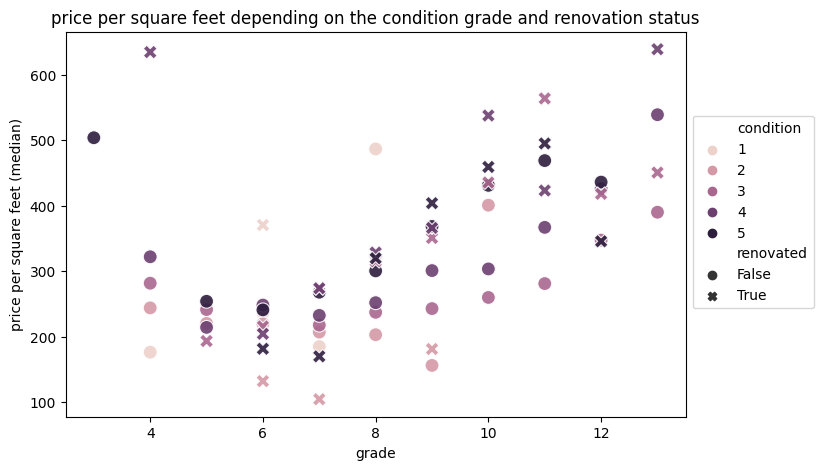

In [45]:
sns.color_palette(palette='deep')
plot=sns.scatterplot(y='price_sqft_med',x='grade',hue='condition',style='renovated',alpha=0.9,data=df_grp,
                     s=100,
                     sizes=(5,5)
                     )
plot.set_xlabel('grade')
plot.set_ylabel('price per square feet (median)')
plot.set_title('price per square feet depending on the condition grade and renovation status')
plot.legend(loc='best',bbox_to_anchor=(1.0, 0.8),fancybox=True,ncol=1)
plt.savefig('price_per_sqft_conditon.png',bbox_inches='tight',dpi=600)